In [245]:
import skimage
import skimage.io
from skimage.color import rgb2hsv, hsv2rgb
import skimage.transform
import matplotlib.pyplot as plt
import numpy
import skimage.draw
import random

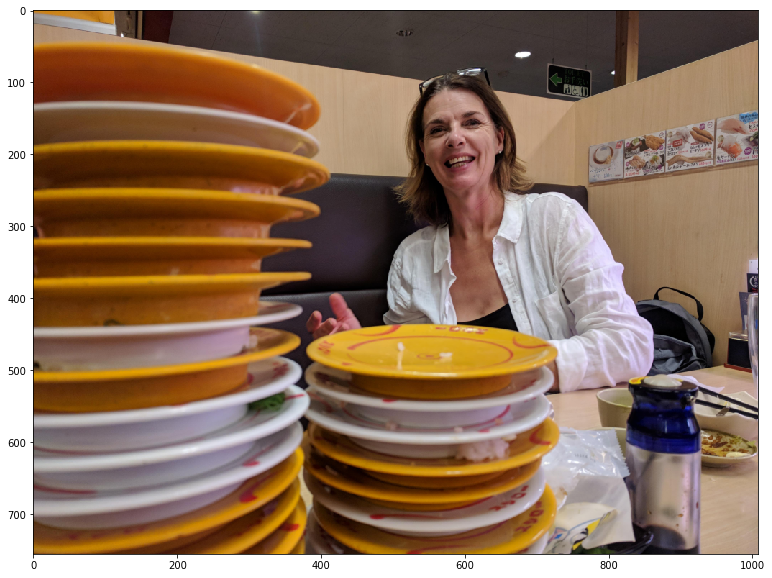

In [246]:
imgo = skimage.io.imread("inputs/IMG_20180718_193840.jpg")
img = skimage.transform.resize(imgo, (imgo.shape[0] // 4, imgo.shape[1] // 4), anti_aliasing=True)
plt.imshow(img)

In [247]:
hsvimg = rgb2hsv(img)

In [248]:
hsvimg.shape

(756, 1008, 3)

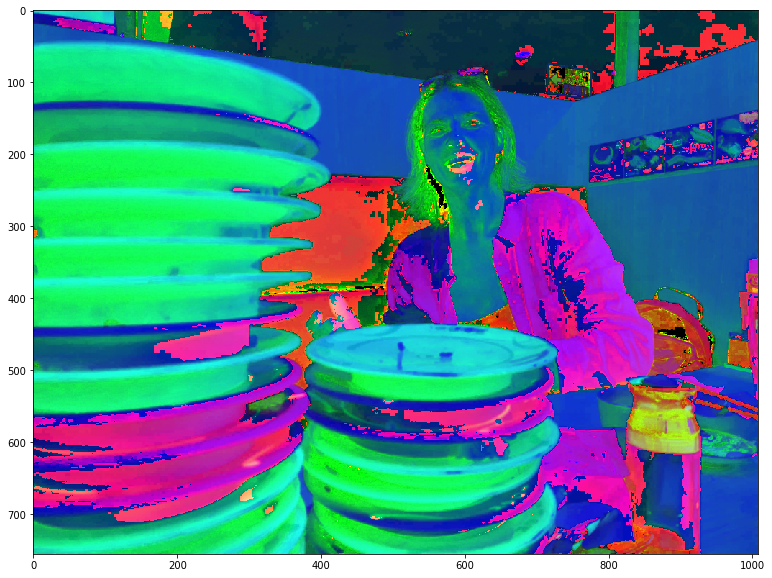

In [249]:
plt.imshow(hsvimg)

In [250]:
canvas = numpy.zeros(hsvimg.shape)
canvas.shape

(756, 1008, 3)

In [251]:
(1,2) + (3,4)

(1, 2, 3, 4)

In [252]:
def random_point(canvas):
    s = canvas.shape
    w = s[1]
    h = s[0]
    return (random.randint(0,h-1), random.randint(0,w-1))

In [253]:
def random_hsv():
    return (random.random(),random.random(),random.random())

In [254]:
def paletted_random_hsv():
    p = random_point(hsvimg)
    return hsvimg[p[0],p[1]]

In [255]:
def add_random_line(canvas,color=None):    
    rr, cc = skimage.draw.line(*(random_point(canvas) + random_point(canvas)))
    if color is None:
        color = paletted_random_hsv()
    canvas[rr, cc] = color

In [256]:
#for i in range(10):
#    add_random_line(canvas)
#plt.imshow(canvas)

In [257]:
def random_line_operator(canvas,n=10):
    canvas = numpy.copy(canvas)
    for i in range(n):
        add_random_line(canvas)
    return canvas

In [258]:
def add_random_circle(canvas,color=None):
    pt = random_point(canvas)
    rr, cc = skimage.draw.circle(pt[0],pt[1], random.randint(25,50), canvas.shape)
    if color is None:
        color = paletted_random_hsv()
    canvas[rr, cc] = color    
    
def random_circle_operator(canvas,n=3):
    canvas = numpy.copy(canvas)
    for i in range(n):
        add_random_circle(canvas)
    return canvas


In [259]:
def mse(x, y):
    return numpy.linalg.norm(x - y)

def mse_random_circle(canvas,color=None):
    """ conditionally draws a circle """
    pt = random_point(canvas)
    rr, cc = skimage.draw.circle(pt[0],pt[1], random.randint(3,50), canvas.shape)    
    if color is None:
        color = paletted_random_hsv()
    omse = mse(canvas[rr, cc],hsvimg[rr,cc])
    nmse = mse((canvas[rr, cc]*0 + 1)*color,hsvimg[rr,cc])
    if (nmse < omse):
        canvas[rr, cc] = color
    
    
def mse_circle_operator(canvas,n=300):
    #canvas = numpy.copy(canvas)
    for i in range(n):
        mse_random_circle(canvas)
    return canvas

In [260]:
def mse(x, y):
    return numpy.linalg.norm(x - y)

import skimage.measure

def isim(x,y):
    return skimage.measure.compare_ssim(x,y,multichannel=True) # dynamic range?

def distance(c1,c2):
    m = mse(c1,c2)
    #s = isim(c1,c2)
    m = 1.0/(1+m)
    return m
    #return (s + m)/2.0

In [261]:
operator = mse_circle_operator

In [265]:
oldd = distance(canvas, hsvimg)
lastd = oldd
for i in range(0,5000):
    new_canvas = operator(canvas)
    d = distance(new_canvas, hsvimg)                                                                                                     
    if d > oldd:        
        print("Replace! %s - %s" % (i,d))
        oldd = d
        canvas = new_canvas
        ratio = (d+0.000001)/(lastd+0.000001)
        if ratio > 1.05:
            lastd = d
            fname = "output/%s.png" % d
            rgbcanvas = hsv2rgb(canvas)
            skimage.io.imsave(fname,rgbcanvas)

Replace! 0 - 0.005471164981466787
Replace! 1 - 0.0054712025642662115
Replace! 2 - 0.005471331655507455
Replace! 3 - 0.005471392669032669
Replace! 4 - 0.005471573258453842
Replace! 7 - 0.005471705071725868
Replace! 8 - 0.00547174045342325
Replace! 9 - 0.005471820374245213
Replace! 11 - 0.005471905590622095
Replace! 13 - 0.005472132216663506
Replace! 15 - 0.005472151478442244
Replace! 17 - 0.005472210573079032
Replace! 18 - 0.005472271273464785
Replace! 19 - 0.005472322809016499
Replace! 20 - 0.005472379843663855
Replace! 21 - 0.005472495399159432
Replace! 22 - 0.005472495824310139
Replace! 23 - 0.005472901327077203
Replace! 25 - 0.0054729555518727505
Replace! 27 - 0.0054730778246379575
Replace! 28 - 0.005473345821992622
Replace! 29 - 0.005473378742451843
Replace! 30 - 0.005473421919138509
Replace! 31 - 0.005473430361478988
Replace! 32 - 0.005473494232123395
Replace! 34 - 0.005474069502167068
Replace! 36 - 0.005474214281521781
Replace! 37 - 0.005474472882702042
Replace! 40 - 0.0054746531

Replace! 354 - 0.005507864899106299
Replace! 357 - 0.0055080283763888705
Replace! 358 - 0.005508508825288832
Replace! 359 - 0.005508694508223807
Replace! 362 - 0.005508926599322713
Replace! 366 - 0.0055089358384546126
Replace! 367 - 0.005509461405433878
Replace! 369 - 0.0055097825369515635
Replace! 370 - 0.0055098409961395305
Replace! 371 - 0.005510125740016881
Replace! 372 - 0.005510237987750938
Replace! 374 - 0.005510241353853544
Replace! 377 - 0.005510261715342956
Replace! 379 - 0.005510327843981852
Replace! 380 - 0.0055103324909424965
Replace! 381 - 0.005510375035265459
Replace! 382 - 0.005510396125166821
Replace! 384 - 0.0055104953253757505
Replace! 387 - 0.005510498099226119
Replace! 388 - 0.005510563621990977
Replace! 389 - 0.005510578577477356
Replace! 390 - 0.005510683699960648
Replace! 391 - 0.0055106841951646415
Replace! 392 - 0.00551072878616369
Replace! 393 - 0.005510785073150024
Replace! 394 - 0.005510916915642934
Replace! 396 - 0.0055110501017023835
Replace! 397 - 0.0055

KeyboardInterrupt: 

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


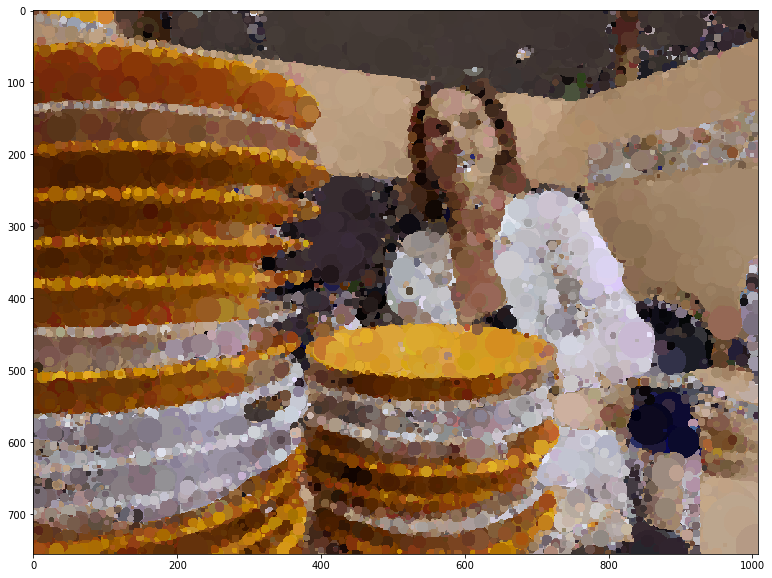

In [266]:
plt.rcParams['figure.figsize'] = [20, 10]
rgbcanvas = hsv2rgb(canvas)
skimage.io.imsave("rgbcanvas.png",rgbcanvas)
fname = "output/%s.png" % d
skimage.io.imsave(fname,rgbcanvas)
plt.imshow(rgbcanvas)

In [156]:
def search_loop(canvas, n=10):
    oldd = distance(canvas, hsvimg)
    for i in range(0,n):
        new_canvas = operator(canvas)
        d = distance(new_canvas, hsvimg)
        if d > oldd:
            print("Replace! %s - %s" % (i,d))
            oldd = d
        canvas = new_canvas
    return canvas

In [158]:
import cProfile
import pstats
cProfile.run('search_loop(canvas,10)','cpout.txt')
p = pstats.Stats('cpout.txt')
p.sort_stats('cumulative').print_stats(10)

Sat Oct 12 12:28:54 2019    cpout.txt

         2399 function calls (2388 primitive calls) in 0.154 seconds

   Ordered by: cumulative time
   List reduced from 47 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.154    0.154 {built-in method builtins.exec}
        1    0.004    0.004    0.154    0.154 <string>:1(<module>)
        1    0.000    0.000    0.150    0.150 <ipython-input-156-b5f139a1b589>:1(search_loop)
       11    0.000    0.000    0.100    0.009 <ipython-input-152-30abdf1e32a9>:9(distance)
       11    0.077    0.007    0.100    0.009 <ipython-input-152-30abdf1e32a9>:1(mse)
    62/51    0.022    0.000    0.053    0.001 {built-in method numpy.core._multiarray_umath.implement_array_function}
       10    0.000    0.000    0.050    0.005 <ipython-input-142-8ac83d010877>:8(random_circle_operator)
      171    0.029    0.000    0.029    0.000 {built-in method numpy.array}
       10    0.000

In [159]:
p.sort_stats('tottime').print_stats(10)

Sat Oct 12 12:28:54 2019    cpout.txt

         2399 function calls (2388 primitive calls) in 0.154 seconds

   Ordered by: internal time
   List reduced from 47 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       11    0.077    0.007    0.100    0.009 <ipython-input-152-30abdf1e32a9>:1(mse)
      171    0.029    0.000    0.029    0.000 {built-in method numpy.array}
    62/51    0.022    0.000    0.053    0.001 {built-in method numpy.core._multiarray_umath.implement_array_function}
       30    0.006    0.000    0.011    0.000 /home/hindle1/.local/lib/python3.6/site-packages/skimage/draw/draw.py:10(_ellipse_in_shape)
       30    0.004    0.000    0.022    0.001 <ipython-input-142-8ac83d010877>:1(add_random_circle)
       30    0.004    0.000    0.016    0.001 /home/hindle1/.local/lib/python3.6/site-packages/skimage/draw/draw.py:44(ellipse)
        1    0.004    0.004    0.154    0.154 <string>:1(<module>)
       30    0.003    